## M5 T01
### - Exercici 1

Primers passos: descarrega el dataset adjunt de dades oficials de la UEFA. 

In [3]:
# Carreguem pandas i la base de dades

import pandas as pd
import numpy as np
equips = pd.read_csv('Lligues europees UEFA.csv', sep = ';', encoding = 'latin_1')
pd.DataFrame(equips).to_numpy()
equips.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [4]:
# Veiem el nom de totes les columnes
list(equips.columns)


['Rk',
 'Squad',
 'Country',
 'LgRk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'Pts',
 'Pts/G',
 'xG',
 'xGA',
 'xGD',
 'xGD/90',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper']

#### Que volen dir els encapçalament de les taules?
La majoria son força comuns: MP: partits jugats; W: victories; GF: gols a favor; Pts: punts = ((W*3) + D); etc. Altres no ho son tant

Buscant per internet es pot trobar:

    xG - the number of expected goals from one or several players, depend on the quality of the kicks.

    xGA - the number of expected goals from opponents, depend on the quality of the kicks.
    
    xGD - the difference between expected scored and expected missed goals.
    
    xGD/90 the difference between expected scored and expected missed goals in 90 minutes.

### - Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

#### Plantejament del problema: 
El 14 d'agost de 2020 el FC Barcelona va perdre contra el Bayern de munich per 2-8; això vol dir 6 gols de diferència.

Volem saber si aquesta differencia era probable o no, amb un alpha de 5%.

H0 -> 6 gols de diferència es un valor normal

Ha -> No ho es

Seleccionem l'atribut xGD/90, que indica la diferencia de gols en 90 minuts. Apliquem un test de dues cues, perque podria haver estat 6 a favor o en contra del FC Barcelona.

#### Test de normalitat de la mostra
Abans d'analitzar les dades hem de comprovar que tene una distribució normal, gaussiana. Segons el resultat farem servir un o un altre test:

Si tene la distribucio normal: _T-test d'una mostra_

Si la distribució no es normal: Mann Whitney U Test

In [5]:
from scipy.stats import shapiro
data = equips['xGD/90']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Probablement no te una distribucio normal: fer servir Mann Whitney U Test')
else:
    print('Probablement te una distribucio normal: farem servir el T-test d\'una mostra')

stat=0.978, p=0.096
Probablement te una distribucio normal: farem servir el T-test d'una mostra


In [6]:
from scipy.stats import ttest_1samp

stat, p = ttest_1samp(equips['xGD/90'], popmean = 6, alternative='two-sided')

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('RESULTAT: Probablement no hay cap diferencia entre 6 gols de diferencia i el promig')
else:
    print('RESULTAT: Probablement hi ha una diferencia entre el promig i obtenir 6 gols de diferència')

stat=-107.701, p=0.000
RESULTAT: Probablement hi ha una diferencia entre el promig i obtenir 6 gols de diferència


Mes recenment el FC Barcelona va perdre per 2-0 enfront del Bayern de Munich. Veiem si era un resultat probable.

H0 -> 2 gols de diferència es un valor normal

Ha -> No ho es

In [7]:
from scipy.stats import ttest_1samp

stat, p = ttest_1samp(equips['xGD/90'], popmean = 2, alternative='two-sided')

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('RESULTAT: Probablement no hay cap diferencia entre 2 gols de diferencia i el promig')
else:
    print('RESULTAT: Probablement hi ha una diferencia entre el promig i obtenir 2 gols de diferència')

stat=-35.889, p=0.000
RESULTAT: Probablement hi ha una diferencia entre el promig i obtenir 2 gols de diferència


#### Vaja sorpresa!!
Un diria que una diferencia de 2 gols seria relativament comú en un partit de futbol, però el valor p viu que hi ha differencia entre el resultat real i el promig considerat.

Mirem la distribució dels valors de la columna xGD/90:

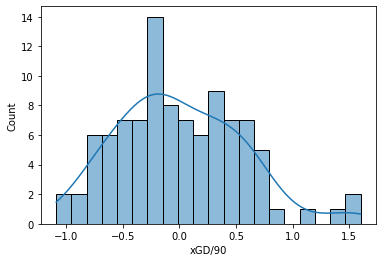

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(equips['xGD/90'], kde = True, bins = 20);

#### Interpretació del Exercici 1

El valor de la diferencia per partir que s'ha fet servir es el promig dels differents equip, a falta d'un valor millor. La variabilitat d'aquest promig es petita i el rang va de -1 a 1.5. Si haguessim fet servir els resultats reals de tots els partit hagues estat més probable que els resultats fossin més varibles.

### - Exercici 2

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Per aquest exercici voldrem saber si hi ha relació entre la asistencia al camp i els punts que te l'equip

Una primera aproximació es veure si hi ha una correlació i calcular el valor p per determinar si hi ha dependència o no

In [9]:
# Test de Normalitat de les dades

from scipy.stats import shapiro
data = equips['Attendance']
stat, p = shapiro(data)
print('Pel que fa a Attendance:','stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Probablement no te una distribucio normal: fer servir Spearman’s Rank Correlation')
else:
    print('Probablement te una distribucio normal: farem servir el Pearson’s Correlation Coefficient')
    
data = equips['Pts']
stat, p = shapiro(data)
print('--')

print('Pel que fa a Pts:','stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Probablement no te una distribucio normal: fer servir Spearman’s Rank Correlation')
else:
    print('Probablement te una distribucio normal: farem servir el Pearson’s Correlation Coefficient')

Pel que fa a Attendance: stat=0.907, p=0.000
Probablement no te una distribucio normal: fer servir Spearman’s Rank Correlation
--
Pel que fa a Pts: stat=0.972, p=0.035
Probablement no te una distribucio normal: fer servir Spearman’s Rank Correlation


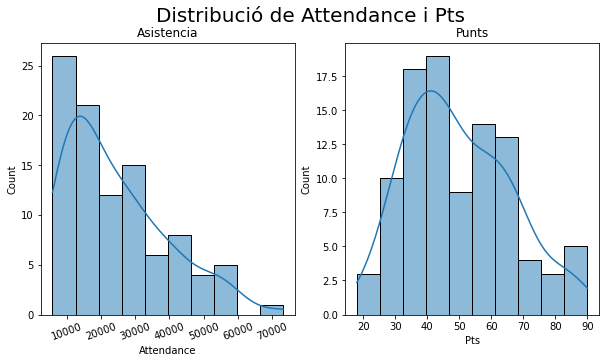

In [10]:
# Veiem els histogrames, que ens mostren una distribució desplaçada cap a l'esquerra, especialment pel que fa a l'asistencia

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.45)
plt.suptitle("Distribució de Attendance i Pts", size = 20)

plt.subplot(1,2,1)
sns.histplot(equips['Attendance'], kde = True, bins=10)
plt.xticks(rotation = 20)
plt.title('Asistencia')

plt.subplot(1,2,2)
sns.histplot(equips['Pts'], kde = True, bins=10)
plt.title('Punts');

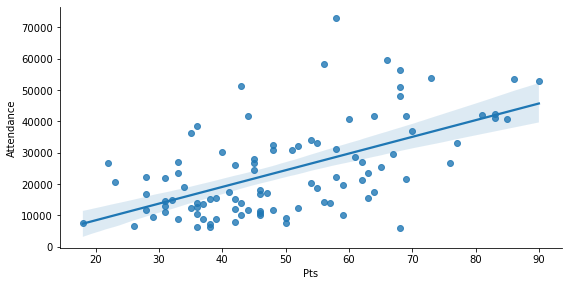

In [11]:
# Veiem aquesta relació gràficament

sns.pairplot(x_vars='Pts', y_vars='Attendance', data=equips, kind='reg', height=4, aspect=2);

In [12]:
# Calculem el Coeficient de Spearman

from scipy.stats import spearmanr
stat, p = spearmanr(equips['Attendance'],equips['Pts'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('RESULTAT: Probablement son dependents')
else:
    print('RESULTAT: Probablement son independents')

stat=0.546, p=0.000
RESULTAT: Probablement son dependents


### - Exercici 2 b

Ho farem servir un test de comprobació d'hipòtesi: Hem de fer servir el Mann-Whitney U Test (no paramètric) perque les dades no tenen una distribució normal

H0 -> Les distribucion de Attendance i Pts son iguals

Ha -> Les distribucions son diferents

In [13]:
# Mann-Whitney U Test
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(equips['Attendance'],equips['Pts'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('RESULTAT: La distribució probablement es diferent')
else:
    print('RESULTAT: La distribució probablement NO es diferent')

stat=9604.000, p=0.000
RESULTAT: La distribució probablement es diferent


#### Cometari
Aquest càlcul no te gaire sentit ja que son valors molt diferents: l'asistencia es el el rang de les decenes de millar, mentres que els punts es de l'order de decenes. 

Hem de normalitzar les mostres:

In [14]:
import pandas
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X = equips['Pts']
X = X.array.reshape(-1, 1)
scaledX = scale.fit_transform(X)

y = equips['Attendance']
y = y.array.reshape(-1, 1)
scaledy = scale.fit_transform(y)

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(scaledX,scaledy)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('RESULTAT: La distribució probablement es diferent')
else:
    print('RESULTAT: La distribució probablement NO es diferent')

stat=4897.000, p=0.812
RESULTAT: La distribució probablement NO es diferent


#### Interpretació del Exercici 2b

Quan normalitzem els valors de Attendance i Pts el valor p es força elevat, la qual cosa demostra que no hi ha cap diferencia 

### - Exercici 3

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Comparerem els gols a favor, en contra i la diferència: GF, GA, GD

In [15]:
# Test de Normalitat de les dades

from scipy.stats import shapiro
data = equips['GF']
stat, p = shapiro(data)
print('Pel que fa a GF:','stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Probablement no te una distribucio normal: fer servir Kruskal-Wallis H Test')
else:
    print('Probablement te una distribucio normal: farem servir ANOVA')

print('--')

data = equips['GA']
stat, p = shapiro(data)
print('Pel que fa a GA:','stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Probablement no te una distribucio normal: fer servir Kruskal-Wallis H Test')
else:
    print('Probablement te una distribucio normal: farem servir ANOVA')
    
print('--')

data = equips['GD']
stat, p = shapiro(data)
print('Pel que fa a GD:','stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Probablement no te una distribucio normal: fer servir Kruskal-Wallis H Test')
else:
    print('Probablement te una distribucio normal: farem servir ANOVA')    


Pel que fa a GF: stat=0.943, p=0.000
Probablement no te una distribucio normal: fer servir Kruskal-Wallis H Test
--
Pel que fa a GA: stat=0.983, p=0.243
Probablement te una distribucio normal: farem servir ANOVA
--
Pel que fa a GD: stat=0.986, p=0.396
Probablement te una distribucio normal: farem servir ANOVA


In [16]:
# Kruskal-Wallis H Test
from scipy.stats import kruskal

stat, p = kruskal(equips['GF'], equips['GA'], equips['GD'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Probably different distributions')
else:
    print('Probably the same distribution')

stat=154.281, p=0.000
Probably different distributions


In [33]:
# Fen una ANOVA, encara que no seria el test mes adient perque una de les series (GF) no te una distribució normal.

from scipy.stats import f_oneway

stat, p = f_oneway(equips['GF'], equips['GA'], equips['GD'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=221.057, p=0.000
Probably different distributions
